In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

matplotlib.style.use('ggplot') # Look Pretty

In [2]:
def drawLine(model, X_test, y_test, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    print("Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0])
    print("Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0])
    print("Est 2045 " + title + " Life Expectancy: ", model.predict([[2045]])[0])

    score = model.score(X_test, y_test)
    title += " R2: " + str(score)
    ax.set_title(title)

    plt.show()

In [3]:
X=pd.read_table('../DAT210x/Module5/Datasets/life_expectancy.csv')
X.describe()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1991.250000,72.730000,78.592500,65.912500,73.262500
std,20.536085,4.968681,5.200561,6.422284,7.157592
min,1900.000000,46.600000,48.700000,32.500000,33.500000
25%,1984.750000,71.800000,78.700000,64.575000,73.400000
50%,1994.500000,73.350000,79.650000,65.250000,73.900000
75%,2004.250000,75.500000,80.500000,69.425000,76.125000
max,2014.000000,76.700000,81.400000,72.500000,78.400000


In [4]:
model=linear_model.LinearRegression()

In [5]:
pre86mask=X['Year']<1986
post85mask=~pre86mask

tmp=X[['Year']]
X_train=tmp[pre86mask]
y_train=X.WhiteMale[pre86mask]

In [6]:
X_test=tmp[post85mask]
y_test=X.WhiteMale[post85mask]

In [7]:
model.fit(X_train,y_train)

/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Est 2014 WhiteMale Life Expectancy:  80.85635425623377
Est 2030 WhiteMale Life Expectancy:  85.39349383777585
Est 2045 WhiteMale Life Expectancy:  89.64706219547145


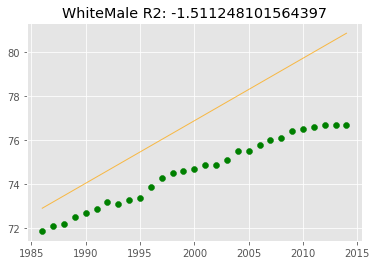

In [8]:
drawLine(model, X_test, y_test, "WhiteMale")

In [9]:
X.loc[X['Year']==2014]

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
39,2014,76.7,81.4,72.5,78.4


In [10]:
X_train=tmp[pre86mask]
X_test=tmp[post85mask]

In [11]:
y_train=X.BlackFemale[pre86mask]
y_test=X.BlackFemale[post85mask]

Est 2014 BlackFemale Life Expectancy:  88.69889939810844
Est 2030 BlackFemale Life Expectancy:  96.11438807681293
Est 2045 BlackFemale Life Expectancy:  103.06640871309844


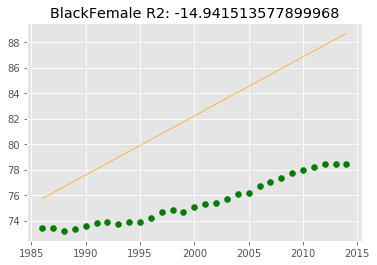

In [12]:
model.fit(X_train,y_train)
drawLine(model, X_test, y_test, "BlackFemale")

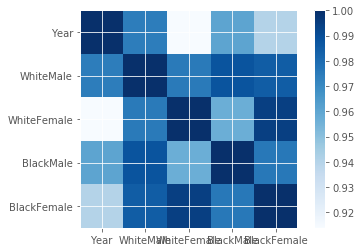

In [14]:
plt.imshow(X.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks=[i for i in range(len(X.columns))]
plt.xticks(tick_marks, X.columns)#, rotation='vertical')
plt.yticks(tick_marks, X.columns)
plt.show()